

# Fraud Detection Project
The goal of this project is to use various classification-based models to detect whether a transaction is a normal payment or a fraud.


<a id='0'></a>
# Problem Definition

In the classification framework defined for this project, the response variable takes
a value of 1 in case the given transaction is fraud and 0 otherwise.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.The task is to get forecast the fraud. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.The features are the result of PCA transformation and aren't intuitive as far as their names are concerned.

The data can be downloaded from: https://www.kaggle.com/mlg-ulb/creditcardfraud

##### <font color='red'> Note: It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues,  not provided the original features and more background information about the data. <font>


<a id='1'></a>
# Getting Started- Loading the data and python packages

<a id='1.1'></a>
## Loading the python packages

In [74]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#Libraries for Saving the Model
from pickle import dump
from pickle import load

import joblib

<a id='1.2'></a>
## Loading the Data

Let's load the data 

#### Note : Due to limit in the github for the data size,  sample of the data has been used in this project.

In [2]:
# load dataset
dataset = read_csv('creditcard_sample.csv')
#dataset = read_csv('creditcard.csv') #Load this for the actual data.

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# Exploratory Data Analysis

<a id='2.1'></a>
## Descriptive Statistics

In [4]:
# shape
dataset.shape

(99999, 31)

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# peek at data
set_option('display.width', 120)
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
# types
#set_option('display.max_rows', 500)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99999 non-null  int64  
 1   V1      99999 non-null  float64
 2   V2      99999 non-null  float64
 3   V3      99999 non-null  float64
 4   V4      99999 non-null  float64
 5   V5      99999 non-null  float64
 6   V6      99999 non-null  float64
 7   V7      99999 non-null  float64
 8   V8      99999 non-null  float64
 9   V9      99999 non-null  float64
 10  V10     99999 non-null  float64
 11  V11     99999 non-null  float64
 12  V12     99999 non-null  float64
 13  V13     99999 non-null  float64
 14  V14     99999 non-null  float64
 15  V15     99999 non-null  float64
 16  V16     99999 non-null  float64
 17  V17     99999 non-null  float64
 18  V18     99999 non-null  float64
 19  V19     99999 non-null  float64
 20  V20     99999 non-null  float64
 21  V21     99999 non-null  float64
 22

As shown in the results above, the entire data type is float, except Class which is integer, and the variable names aren't intuitive.

In [8]:
# describe data
#set_option('precision', 3)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,99999.0,42432.982130,17044.825093,0.000000,33471.500000,44299.000000,55851.000000,67374.000000
V1,99999.0,-0.262096,1.859057,-56.407510,-1.028101,-0.260556,1.153327,1.960497
V2,99999.0,-0.032374,1.656854,-72.715728,-0.598711,0.078315,0.735736,18.902453
V3,99999.0,0.676251,1.322888,-33.680984,0.176781,0.753991,1.376333,4.226108
V4,99999.0,0.162603,1.349249,-5.172595,-0.711442,0.192567,1.032416,16.715537
V5,99999.0,-0.278507,1.356376,-42.147898,-0.898645,-0.314370,0.249733,34.801666
V6,99999.0,0.094066,1.301356,-26.160506,-0.647870,-0.157022,0.486356,22.529298
V7,99999.0,-0.108712,1.210925,-31.764946,-0.600209,-0.069107,0.414667,36.677268
V8,99999.0,0.056009,1.207528,-73.216718,-0.137457,0.074130,0.360506,20.007208
V9,99999.0,-0.046529,1.121255,-9.283925,-0.698812,-0.119105,0.558226,10.392889


Let us check the number of fraud vs. non-fraud cases in the data set.

In [9]:
dataset["Class"].value_counts()

Class
0    99776
1      223
Name: count, dtype: int64

In [10]:
dataset["Class"].value_counts(normalize=True)

Class
0    0.99777
1    0.00223
Name: proportion, dtype: float64

In this sample data, 99.8% of the transactions are payment(non-fraud) where around 0.2% of the transactions are fraud

In [11]:
class_names = {0:'Non-Fraud', 1:'Fraud'}
print(dataset.Class.value_counts(normalize=True).rename(index = class_names))

Class
Non-Fraud    0.99777
Fraud        0.00223
Name: proportion, dtype: float64


The dataset is unbalanced with most of the transactions being non-fraud.

<a id='2.2'></a>
## Data Visualization

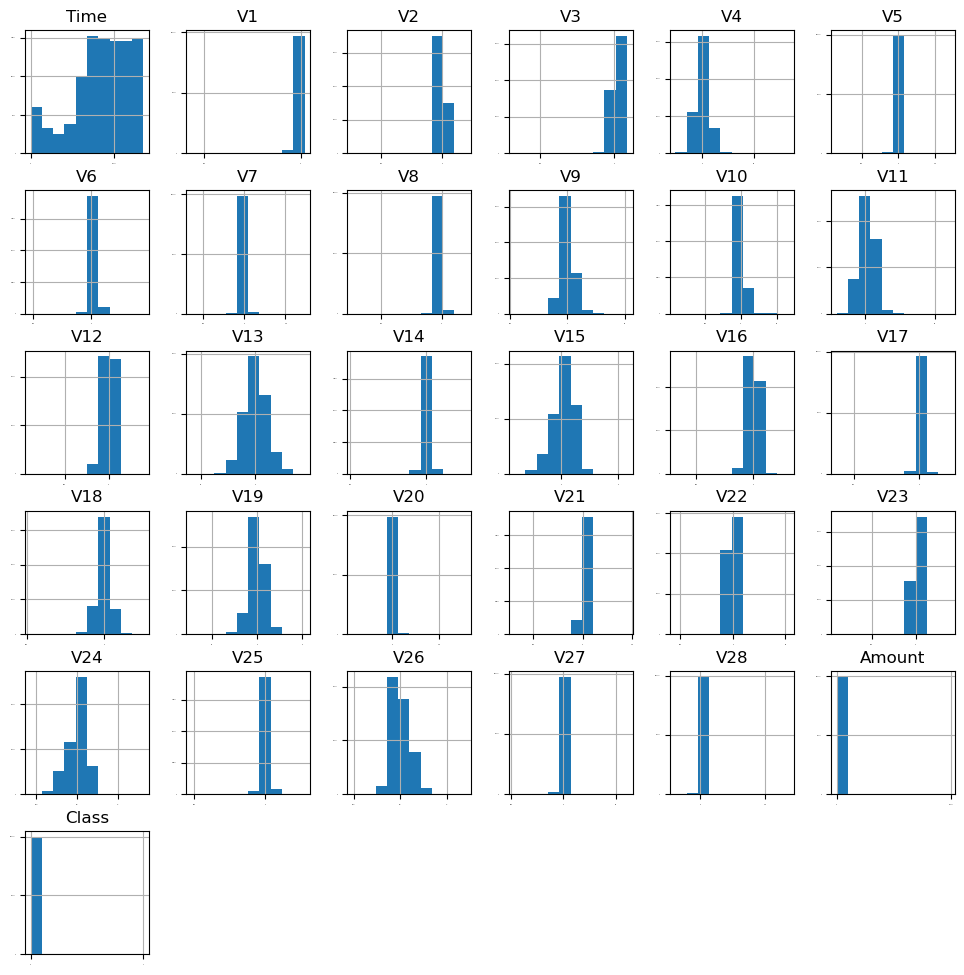

In [12]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

Distribution of most of the variables are highly skewed. However, given the variable names aren't known, we don't get much intuition from the plot.

<a id='3'></a>
## Data Preparation

In [13]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())
dataset.isnull().sum()

Null Values = False


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null in the data, and the data is already in the float format, so there is no need to clean or categorise the data

<a id='3.2'></a>
## Feature Selection

In [14]:
dataset.loc[:, dataset.columns != 'Class']

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,67374,-0.228866,0.086431,0.791165,-1.451021,1.141154,0.070110,0.442420,-0.128557,0.305720,...,0.301183,0.162295,0.732803,-0.380588,-1.086826,0.376692,-0.481770,-0.077937,-0.220115,9.06
99995,67374,-1.336121,1.671947,0.994155,0.420318,-0.440923,-0.008386,-0.893860,-2.051884,-1.091297,...,0.378088,-1.135695,0.509302,0.074188,0.266186,-0.117614,-0.515392,-0.049653,0.085873,2.50
99996,67374,0.662465,-1.336560,0.791566,0.425701,-1.391976,0.145471,-0.476652,0.203164,1.379204,...,0.334664,-0.063744,-0.548785,-0.103769,0.136687,-0.078936,0.948579,-0.075607,0.053555,269.83
99997,67374,-4.930001,-1.090715,0.298037,1.890524,-1.058087,-0.329315,-1.498278,1.750301,-0.325311,...,-0.720732,0.051768,0.166222,-0.585006,0.219239,0.181934,-0.253197,0.113801,-1.043315,45.00


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest( k=10)
bestfeatures
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs         Score
17   V17  20657.815089
14   V14  16227.609484
3     V3  10383.968697
12   V12   9644.179908
10   V10   7909.706201
16   V16   6829.652688
7     V7   6157.563975
11   V11   3567.597482
4     V4   2840.799746
18   V18   2632.036670


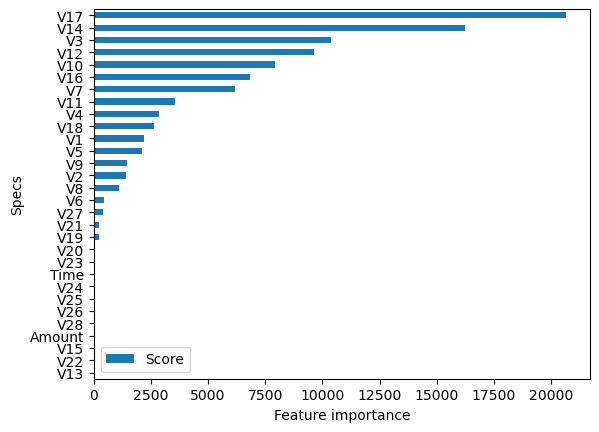

In [16]:
# Visualize the feature importances
featureScores.sort_values(by="Score").plot.barh(x="Specs")
plt.xlabel('Feature importance')
plt.savefig(
    'fraud_detection_Features_importance.png',
    bbox_inches='tight',
    dpi=300,
)

Although some of the features are relevant, feature selection is not given significant preference

<a id='4'></a>
# Selecting & Evaluating Algorithms and Models

<a id='4.1'></a>
## Train Test Split and Evaluation Metrics

In [17]:
# copy the data
df = dataset.copy()
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [18]:
#features = df.drop(columns="Class",inplace=True)

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# split out validation dataset for the end
Y= df["Class"]
X = df.loc[:, dataset.columns != 'Class']
# Make the validation data 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [21]:
print('Data Shapes')
print('--------------')
print('X_train', X_train.shape)
print('X_test ', X_test.shape)
print('y_train', Y_train.shape)
print('y_test ', Y_test.shape)

Data Shapes
--------------
X_train (79999, 30)
X_test  (20000, 30)
y_train (79999,)
y_test  (20000,)


In [22]:
# determine how imbalanced is our class 
Y_test.value_counts()

Class
0    19946
1       54
Name: count, dtype: int64

In [23]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,67374,-0.228866,0.086431,0.791165,-1.451021,1.141154,0.070110,0.442420,-0.128557,0.305720,...,0.301183,0.162295,0.732803,-0.380588,-1.086826,0.376692,-0.481770,-0.077937,-0.220115,9.06
99995,67374,-1.336121,1.671947,0.994155,0.420318,-0.440923,-0.008386,-0.893860,-2.051884,-1.091297,...,0.378088,-1.135695,0.509302,0.074188,0.266186,-0.117614,-0.515392,-0.049653,0.085873,2.50
99996,67374,0.662465,-1.336560,0.791566,0.425701,-1.391976,0.145471,-0.476652,0.203164,1.379204,...,0.334664,-0.063744,-0.548785,-0.103769,0.136687,-0.078936,0.948579,-0.075607,0.053555,269.83
99997,67374,-4.930001,-1.090715,0.298037,1.890524,-1.058087,-0.329315,-1.498278,1.750301,-0.325311,...,-0.720732,0.051768,0.166222,-0.585006,0.219239,0.181934,-0.253197,0.113801,-1.043315,45.00


<a id='4.2'></a>
## 5.2. Checking Models and Algorithms

In [24]:
# test options for classification
num_folds = 12
seed = 7
scoring = 'accuracy'

# spot check some Classification algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [25]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998312 (0.000352)
LDA: 0.999112 (0.000277)


  File "C:\Users\mukht\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\mukht\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mukht\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mukht\anaconda3\Lib\subprocess.

KNN: 0.997925 (0.000508)
CART: 0.999212 (0.000307)


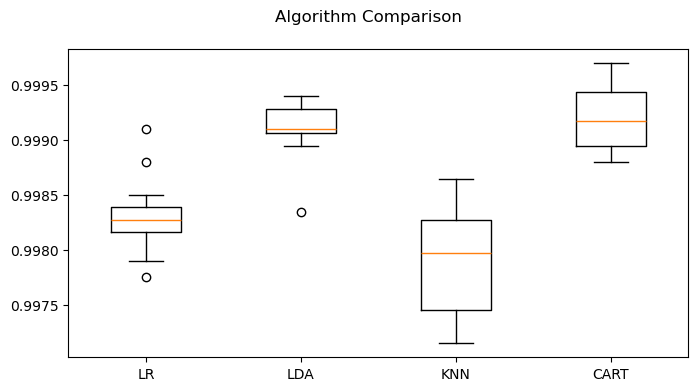

In [26]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.savefig(
    'Algorithm_Comparison.png',
    bbox_inches='tight',
    dpi=300,
);

The accuracy is very high, given that accuracy focusses on the overall no fraud case, but lets check how well it predicts the fraud case. Choosing one of the model DecisionTreeClassifier from the results above.

In [27]:
# prepare model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [28]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_test)
rescaledValidationX = X_test
y_pred = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.99905
[[19938     8]
 [   11    43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19946
           1       0.84      0.80      0.82        54

    accuracy                           1.00     20000
   macro avg       0.92      0.90      0.91     20000
weighted avg       1.00      1.00      1.00     20000



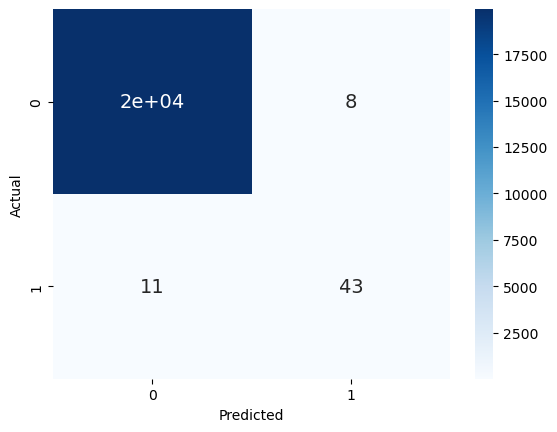

In [29]:
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
# font size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})
plt.savefig(
    'heatmap_confusion_matrix.png',
    bbox_inches='tight',
    dpi=300,
);

In [30]:
df_cm

Predicted,0,1
Actual,,
0,19938,8
1,11,43


Although results are good, but still 11 out of 54 frauds aren't caught. So, we should focus on *recall*, which is a metric which minimises false negative. 

<a id='5'></a>
## Model Tuning and Optimization

<a id='5.1'></a>
## Model Tuning by choosing correct evaluation metric
Evaluation Metric recall is selected, which is a metric which minimises false negative.

In [31]:
scoring = 'recall'

In [32]:
# spot check selected Classification algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [33]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.509877 (0.156089)
LDA: 0.766867 (0.151667)
KNN: 0.015942 (0.028009)
CART: 0.822394 (0.111466)


Given the CART has the best recall out of all the models, it is used to ealuate the test set. But Let's evaluate the LDA using the test set.

In [34]:
# prepare model
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [35]:
# estimate accuracy on validation set
rescaledValidationX = X_test
y_pred = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9992
[[19940     6]
 [   10    44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19946
           1       0.88      0.81      0.85        54

    accuracy                           1.00     20000
   macro avg       0.94      0.91      0.92     20000
weighted avg       1.00      1.00      1.00     20000



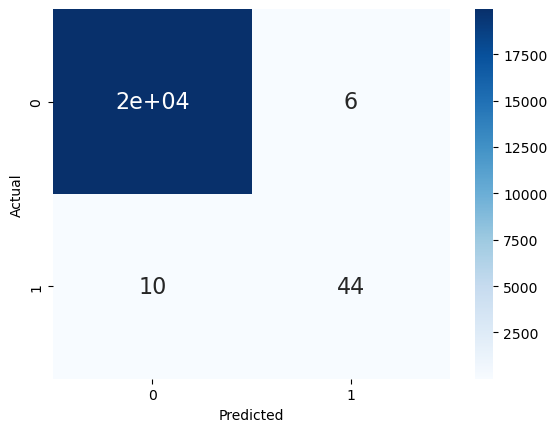

In [36]:
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

LDA performs close similar with DecisionTreeClassifier, only 10 out of cases of fraud not caught. Additionally, false positives are less as well. However, there are still 10 fraud cases in the test set which aren't caught. This will be further taken care in the following section.

<a id='5.2'></a>
## Model Tuning for balancing the sample by Random Under Sampling
In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
1. The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
2. Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
3. After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)


In [37]:
Y_train.value_counts()

Class
0    79830
1      169
Name: count, dtype: int64

In [38]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state=42)
x_train_under , y_train_under = under_sample.fit_resample(X_train, Y_train)
print(x_train_under.shape)
x_train_under.head()

(338, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
88541,62184,0.590458,-0.698363,0.078369,1.316774,-0.414865,0.005616,0.303128,0.035634,-0.242373,...,0.395711,0.319117,0.291431,-0.341485,0.024112,0.449688,-0.297312,-0.026449,0.057625,292.64
13590,24081,0.947141,0.087096,0.747461,1.134552,0.421057,1.725235,-0.586780,0.505804,1.082068,...,-0.212845,0.210413,1.018241,-0.026030,-1.046721,0.268840,-0.153390,0.076801,0.001305,25.85
28494,35033,-1.161100,0.220697,2.822803,0.129401,-0.426211,0.039783,0.128524,0.130691,0.677926,...,0.040322,-0.115217,0.129639,0.093138,0.414798,0.090978,0.457422,0.050734,-0.125928,19.94
58700,48510,1.393618,-0.589818,-0.140201,-0.933876,-0.543879,-0.387707,-0.487168,-0.067812,-1.025567,...,0.123102,0.218640,0.456836,-0.244326,-0.474681,0.685075,-0.083417,-0.018743,-0.004898,35.75
89130,62439,1.008064,-0.164323,0.206580,1.230678,-0.327206,-0.395308,0.209822,-0.126912,0.344534,...,0.103083,-0.169161,-0.654151,-0.150033,-0.136341,0.545862,-0.494595,0.004049,0.041692,130.05


In [51]:
print(y_train_under.value_counts())
print(y_train_under.value_counts(normalize=True))

Class
0    169
1    169
Name: count, dtype: int64
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


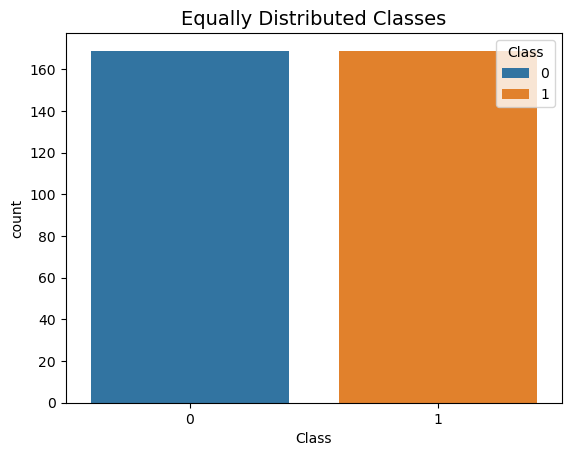

In [40]:
sns.countplot(x=y_train_under, hue=y_train_under)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.
Given the total number of data points are around 400, we try all the Models including Deep Learning Models. 
However, given the data is balanced, the metric used here is accuracy, as it focuses on both false positive and false negative. 

In [41]:
scoring='accuracy'

In [42]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# #Neural Network
# models.append(('NN', MLPClassifier()))

# #Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [43]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, x_train_under, y_train_under, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.949507 (0.037096)
LDA: 0.913793 (0.061007)
KNN: 0.571531 (0.104524)
CART: 0.922824 (0.032324)
NB: 0.922824 (0.065066)
SVM: 0.384236 (0.091043)
AB: 0.955357 (0.041560)
GBM: 0.949405 (0.030786)
RF: 0.949405 (0.047152)
ET: 0.949405 (0.047152)


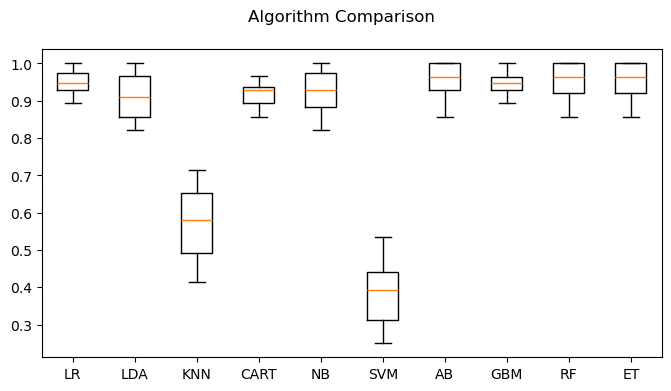

In [44]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

Given that GBM is one of the best model out of all the models, a grid search is performed for GBM model by varing number of estimators and maximum depth. 

In [45]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
# model1 = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train_under, y_train_under)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.955357 using {'max_depth': 2, 'n_estimators': 180}
#3 0.949405 (0.030786) with: {'max_depth': 2, 'n_estimators': 20}
#1 0.955357 (0.029613) with: {'max_depth': 2, 'n_estimators': 180}
#2 0.949507 (0.030837) with: {'max_depth': 2, 'n_estimators': 1000}
#6 0.943452 (0.034064) with: {'max_depth': 3, 'n_estimators': 20}
#3 0.949405 (0.030786) with: {'max_depth': 3, 'n_estimators': 180}
#3 0.949405 (0.030786) with: {'max_depth': 3, 'n_estimators': 1000}
#7 0.931548 (0.044841) with: {'max_depth': 5, 'n_estimators': 20}
#9 0.922824 (0.040843) with: {'max_depth': 5, 'n_estimators': 180}
#8 0.925698 (0.042499) with: {'max_depth': 5, 'n_estimators': 1000}


In [46]:
### prepare model
model = GradientBoostingClassifier(max_depth= 2, n_estimators = 180)
model.fit(x_train_under, y_train_under)

GradientBoostingClassifier(max_depth=2, n_estimators=180)

In [47]:
# estimate accuracy on Original validation set
y_pred = model.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9675
[[19303   643]
 [    7    47]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19946
           1       0.07      0.87      0.13        54

    accuracy                           0.97     20000
   macro avg       0.53      0.92      0.55     20000
weighted avg       1.00      0.97      0.98     20000



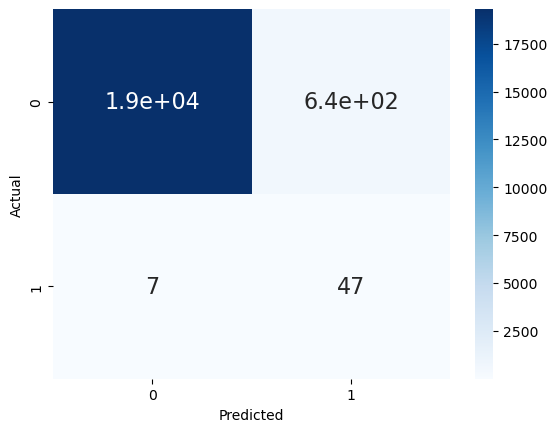

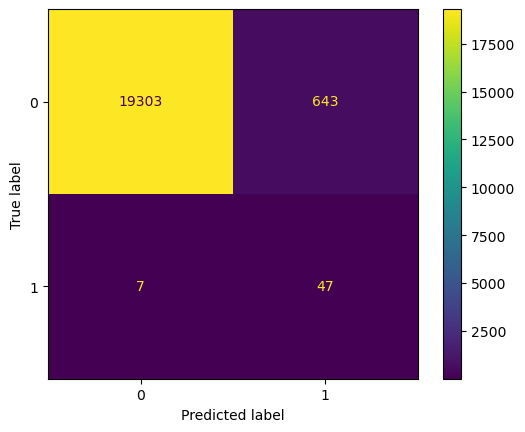

In [59]:
cm= confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_disp.plot();

The results on the test set are really good and the model performs much better with 7 case of fraud not caught. 

In [75]:
# Let's save the model using joblib
joblib.dump(model, 'GradientBoostingClassifier.pkl')

['GradientBoostingClassifier.pkl']

In [82]:
# Let's save the model using pickle
dump(model, open('pickle_GradientBoostingClassifier.pkl', "wb")) #wb= write binary

# Deployment for the Model

In [83]:
# Load model from pkl file

model = joblib.load('GradientBoostingClassifier.pkl') #joblib
model1 = load(open('pickle_GradientBoostingClassifier.pkl', "rb")) #pickle "rb = read binary"

In [85]:
model1

GradientBoostingClassifier(max_depth=2, n_estimators=180)

In [98]:
features = X_train.columns

In [105]:
df.iloc[584]

Time      438.000000
V1          1.491574
V2         -1.088278
V3          0.552852
V4         -1.289876
V5         -1.391175
V6         -0.101768
V7         -1.156643
V8         -0.023064
V9         -1.706012
V10         1.419577
V11         0.625897
V12         0.472241
V13         1.262940
V14        -0.776938
V15        -1.593226
V16        -0.735048
V17         0.554896
V18         0.203064
V19         0.558620
V20        -0.294562
V21        -0.224231
V22         0.008611
V23        -0.090743
V24         0.045121
V25         0.593903
V26        -0.100271
V27         0.052103
V28         0.004537
Amount      2.000000
Class       0.000000
Name: 584, dtype: float64

In [99]:
alice = [df.iloc[584][features].values]
alice

[array([ 4.38000000e+02,  1.49157444e+00, -1.08827775e+00,  5.52852186e-01,
        -1.28987581e+00, -1.39117520e+00, -1.01768023e-01, -1.15664300e+00,
        -2.30635570e-02, -1.70601176e+00,  1.41957718e+00,  6.25897342e-01,
         4.72241372e-01,  1.26293974e+00, -7.76937607e-01, -1.59322584e+00,
        -7.35048175e-01,  5.54896098e-01,  2.03063890e-01,  5.58620125e-01,
        -2.94561898e-01, -2.24230676e-01,  8.61080100e-03, -9.07429740e-02,
         4.51209720e-02,  5.93903444e-01, -1.00271294e-01,  5.21030800e-02,
         4.53739000e-03,  2.00000000e+00])]

In [103]:
# let's build function 
def fraud_detection(fraud_data):
    return model.predict(fraud_data), np.round(model.predict_proba(fraud_data),3)
    

In [104]:
fraud_detection(alice)

(array([0]), array([[0.999, 0.001]]))